In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
#read csv file
#data 
#tot_bilirubin : This is a blood test that measures the amount of a substance called bilirubin. 
    #This test is used to find out how well your liver is working
#direct_bilirubin : Bilirubin is also part of bile, which your liver makes to help digest the food you eat
#Alkaline phosphate :  is used to diagnose liver damage or bone disorders.
#Alamine Aminotransferase:  serve as good indicators of liver damage
df = pd.read_csv('ILPD.csv')

# Sensitivity: probability that a test result will be positive when the disease is present (true positive rate) :
#predicted right 
#int the prsent desease
# Sensitivity: A/(A+C) × 100
# Specificity is the fraction of those without disease who will have a negative test result: predicted worng in 
#the presence desease
#Specificity: D/(D+B) × 100
#Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted 
#observation to 
#the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a
#great measure but only when you have symmetric datasets where values of false positive and false negatives are 
#almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our 
#model, we have got 0.803 which means our model is approx. 80% accurate.

#Accuracy = TP+TN/TP+FP+FN+TN

#Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive
#observations. Precision = TP/TP+FP

#f score  : overall measure of the model 


In [4]:
# fill all NAs with suitable value
def confusionMatrix(actual,predicted):
    
    cm = confusion_matrix(actual,predicted)
    print('\nConfusion Matrix : \n'+ str(cm))

    total=cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0]

    accuracy=(cm[0,0]+cm[1,1])/total
    print('\nAccuracy : '+ str(accuracy))

    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('\nSensitivity : '+ str(sensitivity ))
    
    precision = cm[0,0]/(cm[0,0]+cm[1,0])
    print('\nPrecision: ' + str(precision))

    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('\nSpecificity : ' + str(specificity))
    
    fscore = 2*precision*sensitivity/(precision+sensitivity)
    print('\nF-Score : ' + str(fscore))
    
df = df.fillna(method = 'ffill')

In [5]:
#correlation plot
sns.set(style="white")
sns.set(style="white",color_codes=True)

In [6]:
sns.heatmap(df.corr())
plt.title('Correlation Plot')

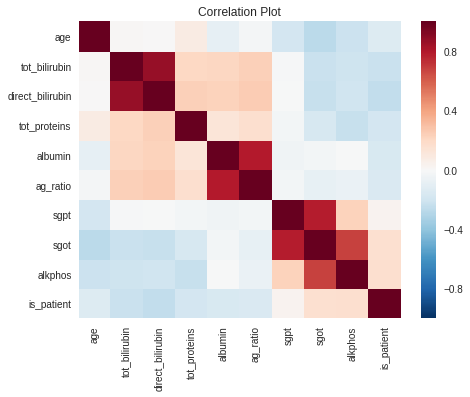

In [7]:
plt.subplots_adjust(left=0.25, bottom=0.25, right=0.95, top=1, wspace=0, hspace=0)
plt.show()

Co-relation Total_bilirubin vs Direct Bilirubin


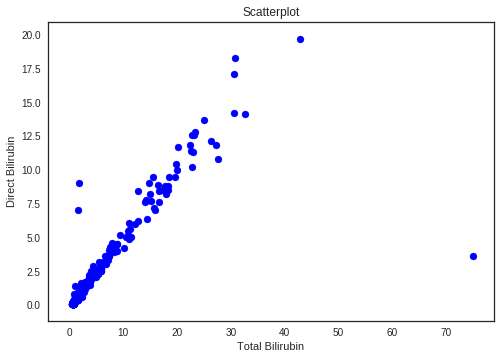

Co-relation Plot  Age vs Total Proteins


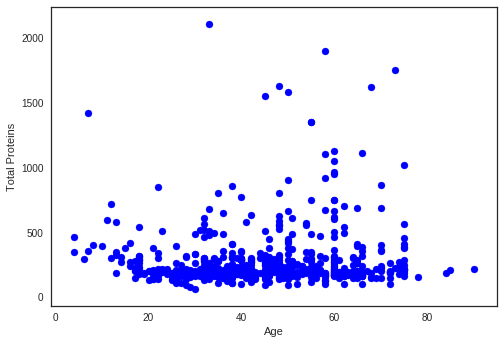

In [8]:
#shuffle the data
df = shuffle(df)

x = df['tot_bilirubin']
y = df['direct_bilirubin']
plt.title('Scatterplot')
plt.xlabel('Total Bilirubin')
plt.ylabel('Direct Bilirubin')
for index in range(0,583):
    plt.scatter(x[index], y[index], c = 'blue')
print("Co-relation Total_bilirubin vs Direct Bilirubin")
plt.show()

print("Co-relation Plot  Age vs Total Proteins")
x = df['age']
y = df['tot_proteins']
plt.xlabel('Age')
plt.ylabel('Total Proteins')
for index in range(0,583):
    plt.scatter(x[index], y[index], c = 'blue')
plt.show()


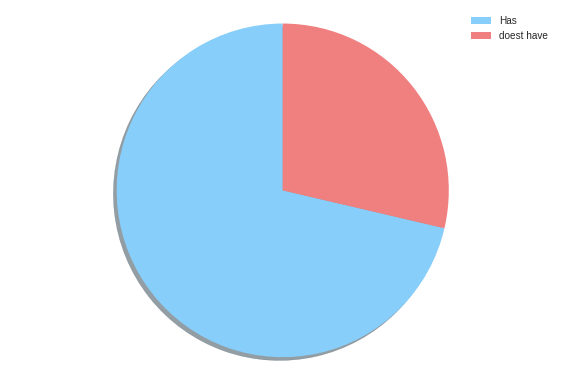

In [9]:
X = np.array(df.iloc[:, 0:9])
y = np.array(df['is_patient'])
x_count = np.count_nonzero(y == 1)
y_count = y.size - x_count
sizes = [x_count , y_count]
labels = ['Has', 'doest have']
colors = ['lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

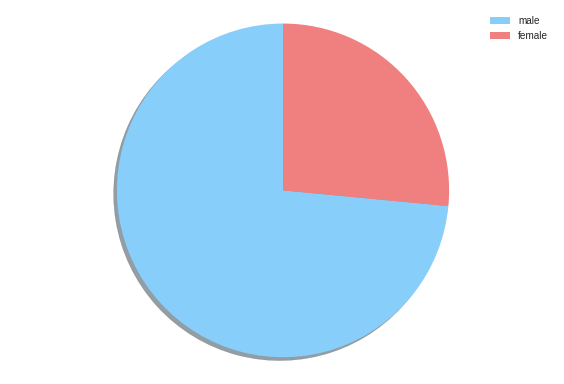

In [10]:
#replace female with 0 and men with 1
for i in X:
    #print(i[1])
    if i[1] == "Female":
        y_count = y_count + 1
        i[1] = 0
    else:
        i[1] = 1
        x_count = x_count + 1
        
sizes = [x_count , y_count]
labels = ['male', 'female']
colors = ['lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()



In [11]:
#randoms_state plit will be always the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




Using SVM Classifier


The accuracy of the SVM Classfier is 77%

Confusion Matrix : 
[[148   0]
 [ 44   1]]

Accuracy : 0.772020725389

Sensitivity : 1.0

Precision: 0.770833333333

Specificity : 0.0222222222222

F-Score : 0.870588235294


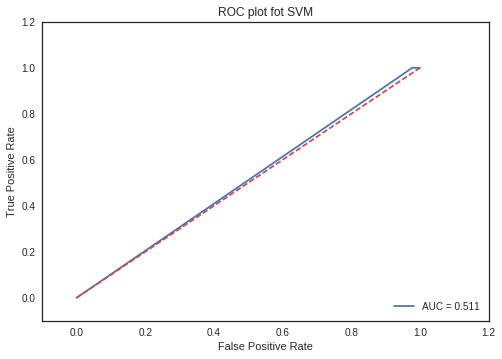

In [12]:
#svm
clf = svm.SVC(shrinking=True,kernel = 'rbf')
clf.fit(X_train,y_train)
pred_svm = clf.predict(X_test)
acc_svm = accuracy_score(y_test, pred_svm) * 100
print('\n\n\nUsing SVM Classifier')
print('\n\nThe accuracy of the SVM Classfier is %d%%' % acc_svm)
confusionMatrix(y_test, pred_svm)
#print(re)
ny_test = list(y_test)
npred_svm = list(pred_svm)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

for i in range(0,193):
    if(ny_test[i] == 2):
        ny_test[i] = 0

for i in range(0,193):
    if(npred_svm[i] == 2):
        npred_svm[i] = 0
        
false_positive_rate, true_positive_rate, thresholds = roc_curve(ny_test, npred_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.3f'% roc_auc)
plt.title("ROC plot fot SVM")
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




Using KNN Classifier


The accuracy of the knn classfier is 72%

Confusion Matrix : 
[[126  22]
 [ 31  14]]

Accuracy : 0.725388601036

Sensitivity : 0.851351351351

Precision: 0.802547770701

Specificity : 0.311111111111

F-Score : 0.826229508197


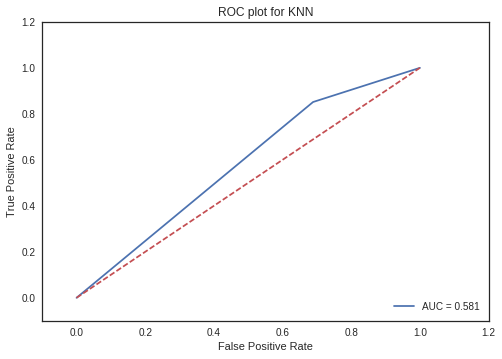

In [13]:
# KNN Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print('\n\n\nUsing KNN Classifier')
acc_knn = accuracy_score(y_test, pred_knn) * 100
print('\n\nThe accuracy of the knn classfier is %d%%' % acc_knn)
confusionMatrix(y_test, pred_knn)
   
ny_test = list(y_test)
npred_knn = list(pred_knn)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

for i in range(0,193):
    if(ny_test[i] == 2):
        ny_test[i] = 0

for i in range(0,193):
    if(npred_knn[i] == 2):
        npred_knn[i] = 0
        
false_positive_rate, true_positive_rate, thresholds = roc_curve(ny_test, npred_knn)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.3f'% roc_auc)
plt.title("ROC plot for KNN")
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




Using Logistic Regression


The accuracy of Logistic Regression is 77%

Confusion Matrix : 
[[139   9]
 [ 35  10]]

Accuracy : 0.772020725389

Sensitivity : 0.939189189189

Precision: 0.798850574713

Specificity : 0.222222222222

F-Score : 0.863354037267

------------Important cofficient---------------------


The values corresponds to the column in the data


Pvale matrix : 

[  1.06026038e-15   3.26051096e-01   1.02392469e-73   1.43195838e-42
   0.00000000e+00   0.00000000e+00   0.00000000e+00   7.18819085e-01
   8.05697402e-02]

Odd's Ratio : 

[[ -1.48940665e-02   1.50823218e-03  -1.16778357e-02  -4.31986812e-01
   -3.68257746e-04  -6.02244316e-03  -3.01410397e-03  -3.53280762e-01
    5.99052167e-01]]

Cofficient value(beta)

[[ 0.9852163   1.00150937  0.98839009  0.64921794  0.99963181  0.99399566
   0.99699043  0.70237996  1.82039255]]

-----------------------------------------------------



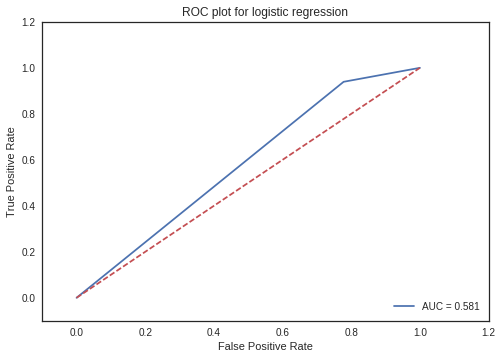

In [19]:
#logistic regression
reg = LogisticRegression()
result = reg.fit(X_train, y_train)
pred_reg = reg.predict(X_test)
acc_reg = accuracy_score(y_test, pred_reg) * 100
print('\n\n\nUsing Logistic Regression')
print('\n\nThe accuracy of Logistic Regression is %d%%' % acc_reg)
confusionMatrix(y_test, pred_reg)

from sklearn.feature_selection import chi2
scores, pvalues = chi2(X, y)


print("\n------------Important cofficient---------------------\n")
print("\nThe values corresponds to the column in the data\n")

print("\nPvale matrix : \n")
print(pvalues)

print("\nOdd's Ratio : \n")
obj1 = np.exp(result.coef_)

print(result.coef_)


print("\nCofficient value(beta)\n")

print(obj1)


print("\n-----------------------------------------------------\n")
ny_test = list(y_test)
npred_reg = list(pred_reg)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

for i in range(0,193):
    if(ny_test[i] == 2):
        ny_test[i] = 0

for i in range(0,193):
    if(npred_reg[i] == 2):
        npred_reg[i] = 0
        
false_positive_rate, true_positive_rate, thresholds = roc_curve(ny_test, npred_reg)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.3f'% roc_auc)
plt.title("ROC plot for logistic regression")
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()